In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.float_format='{:.2f}'.format

# data cleaning

## data loading

In [2]:
data = pd.read_csv("data.csv")
backup = data.copy()

## data discovery

In [3]:
data.dtypes.value_counts()

float64    93
int64       3
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# pd.set_option("display.max_rows", 100)

countValues = pd.DataFrame(data.isna().sum(), columns=["value"]).reset_index()
countNull = countValues[countValues["value"] > 0]
countNull

,index,value


## correlation

In [6]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# %matplotlib inline

correlation = data.corr()

# mask = np.zeros_like(correlation, dtype=bool)
# mask[np.triu_indices_from(mask)]= True

# cmap = sns.diverging_palette(180, 180, as_cmap=True)

# plt.figure(figsize=(50,25))
# sns.plot = sns.heatmap(
#     correlation, 
#     mask = mask,
#     cmap = cmap,
#     vmax = .9,
#     center = 0,
#     square = True,
#     linewidths = .5,
#     cbar_kws = {"shrink": .5},
#     annot_kws={"fontsize":6},
#     annot = True, 
#     fmt = ".1f")

## data preparation

In [7]:
upper_tri = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

In [8]:
data = data.drop(columns = to_drop).copy()

## no low variance

In [9]:
lowVariance = data.var().to_frame().sort_values(by = 0)
locate_lowVariance = lowVariance.loc[lowVariance[0] < 0.01].T.columns.tolist()
lowVar = data.drop(columns = locate_lowVariance)

## check outliers

In [10]:
# # original data
# print("ORIGINAL DATA")
# for col in backup.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(backup[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [11]:
# # no correlation data
# print("NO CORRELATION DATA")
# for col in data.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(data[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [12]:
# # no low variance data
# print("NO no low variance DATA")
# for col in lowVar.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(lowVar[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

# data transformation

## data splitting

In [13]:
# original data
X_backup = backup.drop(columns="Bankrupt?")
y_backup = backup["Bankrupt?"]

# no correlation data
X_data = data.drop(columns="Bankrupt?")
y_data = data["Bankrupt?"]

# no low variance data
X_lowVar = lowVar.drop(columns="Bankrupt?")
y_lowVar = lowVar["Bankrupt?"]

In [14]:
# from sklearn.model_selection import train_test_split

# # original data
# X_trainBackup, X_testBackup, Y_trainBackup, Y_testBackup = train_test_split(X_backup, y_backup, test_size=.2, random_state=42)

# # no correlation data
# X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size=.2, random_state=42)

# # no low variance data
# X_trainLowVar, X_testLowVar, Y_trainLowVar, Y_testLowVar = train_test_split(X_lowVar, y_lowVar, test_size=.2, random_state=42)

from sklearn.model_selection import train_test_split

# For original data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_backup, y_backup, test_size=0.3, random_state=42)

# For no correlation data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# For no low variance data
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lowVar, y_lowVar, test_size=0.3, random_state=42)

## data scaling

In [15]:
# from sklearn.preprocessing import MinMaxScaler

# # ORIGINAL DATA
# scalerBackup = MinMaxScaler().fit(X_trainBackup)
# X_train_scaledBackup = scalerBackup.transform(X_trainBackup)
# X_test_scaledBackup = scalerBackup.transform(X_testBackup)

# # NO CORRELATION DATA
# scaler = MinMaxScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # NO LOW VARIANCE DATA
# scalerLowVar = MinMaxScaler().fit(X_trainLowVar)
# X_train_scaledLowVar = scalerLowVar.transform(X_trainLowVar)
# X_test_scaledLowVar = scalerLowVar.transform(X_testLowVar)


# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_backup_scaled = scaler.fit_transform(X_backup)
# X_data_scaled = scaler.fit_transform(X_data)
# X_lowVar_scaled = scaler.fit_transform(X_lowVar)


In [16]:
# # needed because the transformation also reset the index for X_train_scaled
# # so we need this for y_test as well...

# # ORIGINAL DATA
# Y_trainBackup = Y_trainBackup.reset_index(drop=True) 
# Y_testBackup = Y_testBackup.reset_index(drop=True)

# # NO CORRELATION DATA
# Y_train = Y_train.reset_index(drop=True) 
# Y_test = Y_test.reset_index(drop=True)

# # NO LOW VARIANCE DATA
# Y_trainLowVar = Y_trainLowVar.reset_index(drop=True) 
# Y_testLowVar = Y_testLowVar.reset_index(drop=True)

## data behaviour

In [17]:
# # ORIGINAL DATA
# sns.pairplot(backup, hue="Bankrupt?")

# # NO CORRELATION DATA
# sns.pairplot(data, hue="Bankrupt?")

# # NO LOW VARIANCE DATA
# sns.pairplot(lowVar, hue="Bankrupt?")

## training ComplementNB model

In [18]:
# from sklearn.naive_bayes import ComplementNB
# from sklearn.metrics import accuracy_score, classification_report

# # instantiate models
# modelBackup = ComplementNB()
# model = ComplementNB()
# modelLowVar = ComplementNB()

# # fit models
# modelBackup.fit(X_train_scaledBackup, Y_trainBackup)
# model.fit(X_train_scaled, Y_train)
# modelLowVar.fit(X_train_scaledLowVar, Y_trainLowVar)

# # make predictions
# predictionsBackup = modelBackup.predict(X_test_scaledBackup)
# predictions = model.predict(X_test_scaled)
# predictionsLowVar = modelLowVar.predict(X_test_scaledLowVar)

# # check accuracy
# accuracyBackup = round(accuracy_score(Y_testBackup, predictionsBackup), 2)
# accuracy = round(accuracy_score(Y_test, predictions), 2)
# accuracyLowVar = round(accuracy_score(Y_testLowVar, predictionsLowVar), 2)

# print(f"Backup model accuracy: {accuracyBackup}")
# print(f"No correlation model accuracy: {accuracy}")
# print(f"No low variance model accuracy: {accuracyLowVar}")

# # more detailed classification report (precision, recall, F1-score)
# from sklearn.metrics import precision_recall_fscore_support as score

# def rounded_classification_report(y_true, y_pred):
#     precision, recall, fscore, _ = score(y_true, y_pred, average="weighted")
#     print("Precision: {}".format(round(precision, 2)))
#     print("Recall: {}".format(round(recall, 2)))
#     print("F1 score: {}".format(round(fscore, 2)))

# print("\nBackup model classification report:")
# rounded_classification_report(Y_testBackup, predictionsBackup)

# print("\nNo correlation model classification report:")
# rounded_classification_report(Y_test, predictions)

# print("\nNo low variance model classification report:")
# rounded_classification_report(Y_testLowVar, predictionsLowVar)

from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()

# For original data
cnb_b = cnb.fit(X_train_b, y_train_b)

# For no correlation data
cnb_d = cnb.fit(X_train_d, y_train_d)

# For no low variance data
cnb_l = cnb.fit(X_train_l, y_train_l)

Backup model accuracy: 0.75
No correlation model accuracy: 0.75
No low variance model accuracy: 0.75

Backup model classification report:
Precision: 0.94
Recall: 0.75
F1 score: 0.83

No correlation model classification report:
Precision: 0.94
Recall: 0.75
F1 score: 0.83

No low variance model classification report:
Precision: 0.94
Recall: 0.75
F1 score: 0.83


The results show that all three models -- the Backup model, the No Correlation model, and the No Low Variance model -- perform the same, with identical metrics for accuracy, precision, recall, and F1 score.

Here's what each metric represents:

- **Accuracy**: This is the proportion of true results (both true positives and true negatives) in the total number of cases examined. In our case, all models have an accuracy of 0.75 or 75%, meaning we correctly predict bankruptcy 75% of the time.

- **Precision**: This is the proportion of true positives (cases where the model correctly predicts bankruptcy) against all positive results returned by the model (both correct predictions and false alarms). A precision of 0.94 or 94% means that when we predict a company will go bankrupt, we are correct 94% of the time.

- **Recall (Sensitivity)**: This is the proportion of true positives against all actual positives (cases where the company goes bankrupt). A recall of 0.75 or 75% means that our models detect 75% of all actual bankruptcies.

- **F1 Score**: This is a balanced measure of precision and recall, taking both metrics into account. An F1 score of 0.83 suggests a balanced model with a good compromise between precision and recall.

Overall, these results suggest that all three models perform quite well, with high precision and good recall. However, the identical performance across all three models indicates that neither the removal of correlated features nor the removal of low variance features improved our model's performance. This suggests that these features may not have been causing overfitting or bias in the original model, and it's possible that the features in the dataset are all important for predicting bankruptcy.

_**WHAT CAN WE DO ABOUT IT?**_

Based on our current results, it seems like our models are performing reasonably well with a balance between precision and recall. However, if we want to improve the performance further or make it more suitable to our specific needs (for example, reducing false negatives to ensure fewer bankruptcies are missed), here are some suggestions:

1. **Threshold Adjustment**: Adjusting the decision threshold can be a useful strategy. For instance, if we're using a model that predicts probabilities (like logistic regression), we can adjust the threshold for classifying a prediction as positive (default is usually 0.5). Lowering the threshold will increase recall (fewer missed actual positives) but may decrease precision (more false positives).

2. **Class Weight Adjustment**: If our dataset is imbalanced (e.g., fewer bankrupt than non-bankrupt companies), we could try adjusting class weights in our model, which will assign a higher penalty for incorrectly classifying the minority class.

3. **Sampling Techniques**: If we have an imbalanced dataset, we can also use over-sampling techniques (like SMOTE) or under-sampling techniques to balance our dataset.

4. **Feature Engineering**: We can engineer new features that could be more predictive of bankruptcy. For example, financial ratios are often used in predicting bankruptcy.

5. **Model Selection and Ensembling**: We could try other machine learning algorithms or ensemble methods to see if they perform better.

6. **Hyperparameter Tuning**: Tuning the hyperparameters of our model can often lead to better performance. For instance, we can use methods like grid search or randomized search to find the best hyperparameters for our model.

7. **Cross-validation**: We can use cross-validation to get a more robust estimate of our model performance.

8. **Domain-specific knowledge**: Incorporating domain-specific knowledge can greatly improve the model. For example, in bankruptcy prediction, understanding financial indicators and economic conditions can be very useful.

Remember, it's always important to understand the business or real-world implications of adjusting these parameters. Increasing recall by decreasing the threshold, for example, will identify more bankruptcies, but it will also increase the number of false positives. The choice of strategy depends on which errors are more acceptable in our specific use case.

## making predictions

In [ ]:
# For original data
y_pred_b = cnb_b.predict(X_test_b)

# For no correlation data
y_pred_d = cnb_d.predict(X_test_d)

# For no low variance data
y_pred_l = cnb_l.predict(X_test_l)

## evalutate the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For original data
print('Original Data:')
print('Classification Report:')
print(classification_report(y_test_b, y_pred_b))
print('Confusion Matrix:')
print(confusion_matrix(y_test_b, y_pred_b))
print('Accuracy Score:', accuracy_score(y_test_b, y_pred_b))
print('------------------------------------------------')

# For no correlation data
print('No Correlation Data:')
print('Classification Report:')
print(classification_report(y_test_d, y_pred_d))
print('Confusion Matrix:')
print(confusion_matrix(y_test_d, y_pred_d))
print('Accuracy Score:', accuracy_score(y_test_d, y_pred_d))
print('------------------------------------------------')

# For no low variance data
print('No Low Variance Data:')
print('Classification Report:')
print(classification_report(y_test_l, y_pred_l))
print('Confusion Matrix:')
print(confusion_matrix(y_test_l, y_pred_l))
print('Accuracy Score:', accuracy_score(y_test_l, y_pred_l))
print('------------------------------------------------')

## retrain the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'norm': [True, False]
}

grid_search = GridSearchCV(estimator=cnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_b, y_train_b)

# Check the best parameters
print('Best Parameters:')
print(grid_search.best_params_)

## confusion matrix

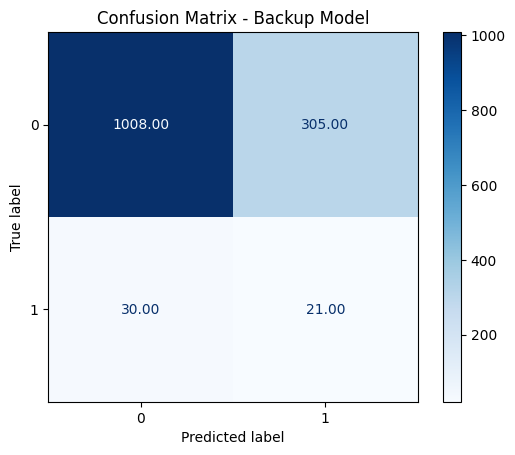

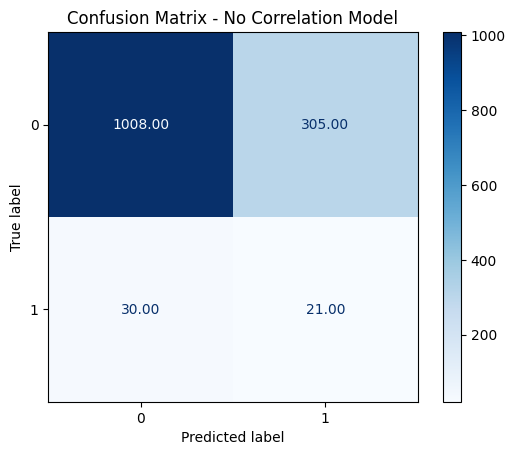

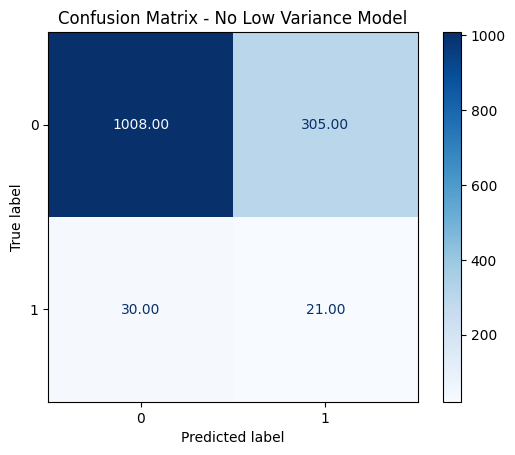

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices
cm_backup = confusion_matrix(Y_testBackup, predictionsBackup)
cm_no_corr = confusion_matrix(Y_test, predictions)
cm_low_var = confusion_matrix(Y_testLowVar, predictionsLowVar)

# Display confusion matrix for Backup model
ConfusionMatrixDisplay(cm_backup, display_labels=modelBackup.classes_).plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix - Backup Model")
plt.show()

# Display confusion matrix for No correlation model
ConfusionMatrixDisplay(cm_no_corr, display_labels=model.classes_).plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix - No Correlation Model")
plt.show()

# Display confusion matrix for No low variance model
ConfusionMatrixDisplay(cm_low_var, display_labels=modelLowVar.classes_).plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix - No Low Variance Model")
plt.show()

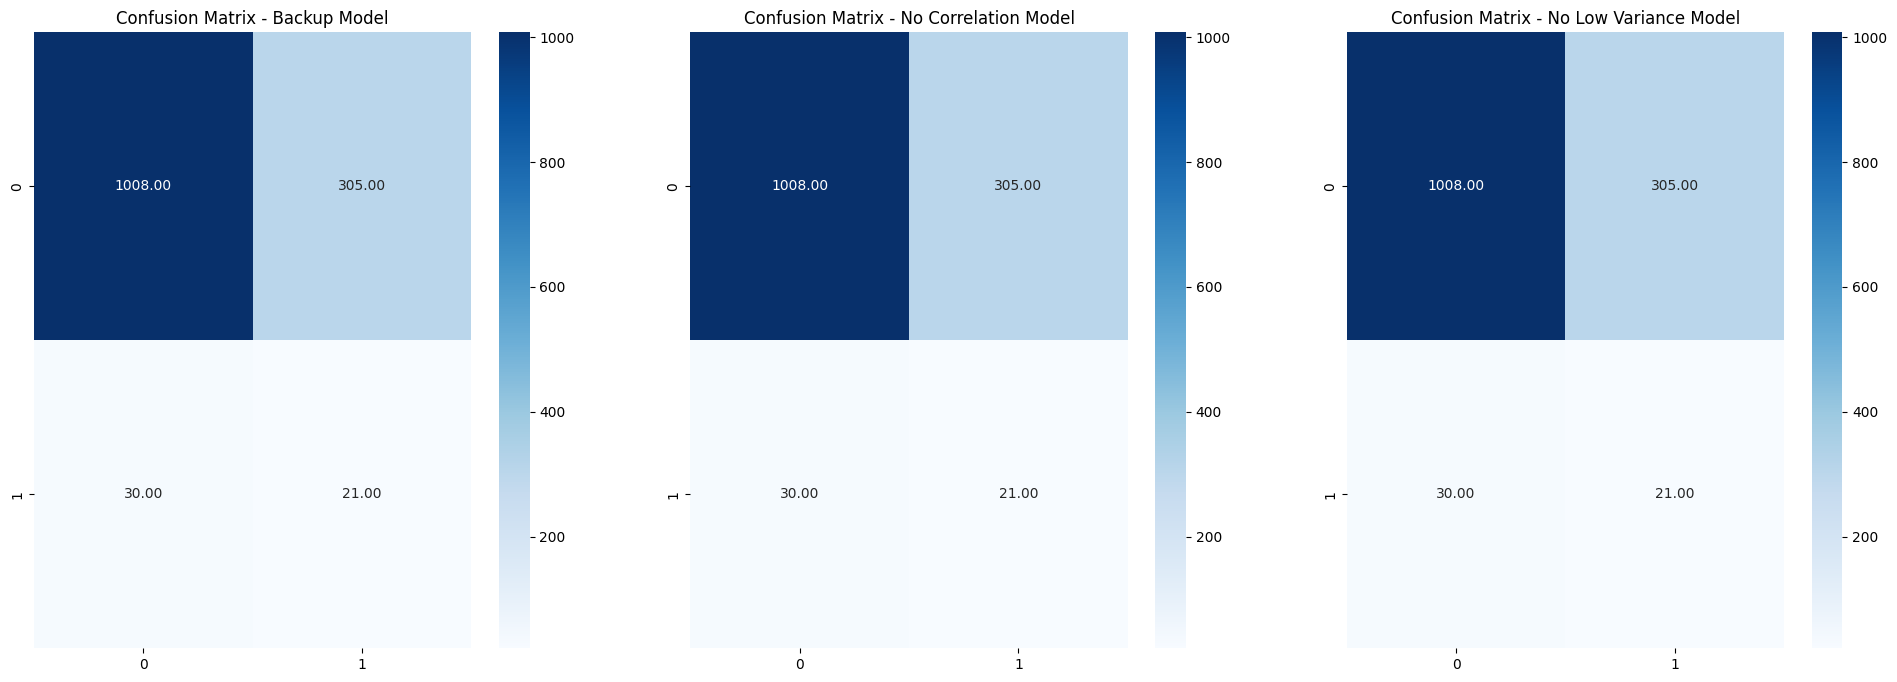

In [20]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix for each model
cm_backup = confusion_matrix(Y_testBackup, predictionsBackup)
cm_no_corr = confusion_matrix(Y_test, predictions)
cm_low_var = confusion_matrix(Y_testLowVar, predictionsLowVar)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# plot the confusion matrix for Backup model
sns.heatmap(cm_backup, annot=True, fmt=".2f", cmap="Blues", ax=axs[0])
axs[0].set_title("Confusion Matrix - Backup Model")

# plot the confusion matrix for No correlation model
sns.heatmap(cm_no_corr, annot=True, fmt=".2f", cmap="Blues", ax=axs[1])
axs[1].set_title("Confusion Matrix - No Correlation Model")

# plot the confusion matrix for No low variance model
sns.heatmap(cm_low_var, annot=True, fmt=".2f", cmap="Blues", ax=axs[2])
axs[2].set_title("Confusion Matrix - No Low Variance Model")

plt.show()

# data enhancements

## handling imbalance

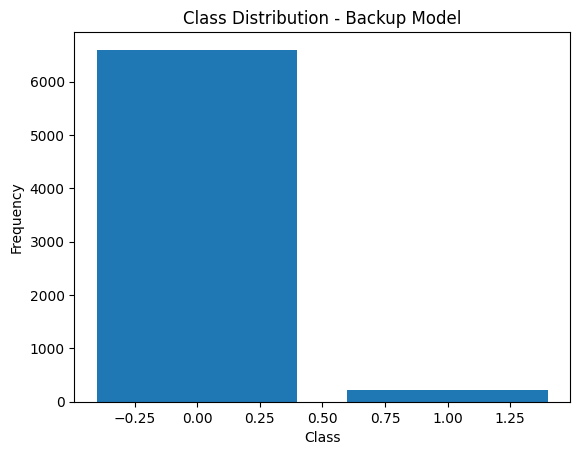

Cross-validation scores (Before SMOTE): ['0.78', '0.76', '0.75', '0.73', '0.80']
Average cross-validation score (Before SMOTE): 0.76
Class distribution (Before SMOTE): Counter({0: 5286, 1: 169})
Class distribution (After SMOTE): Counter({0: 5286, 1: 5286})


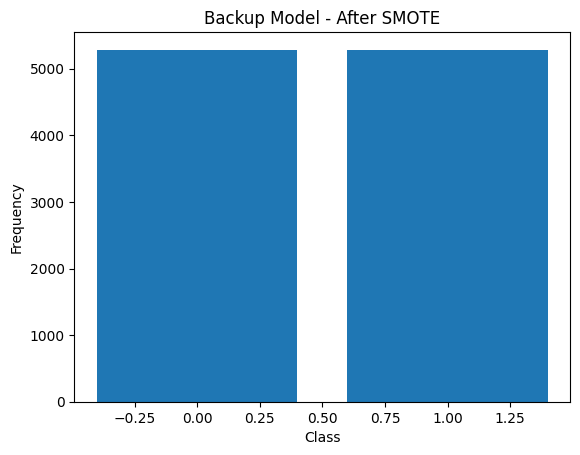

Cross-validation scores (After SMOTE): ['0.59', '0.61', '0.60', '0.60', '0.61']
Average cross-validation score (After SMOTE): 0.60
Test score: 0.70


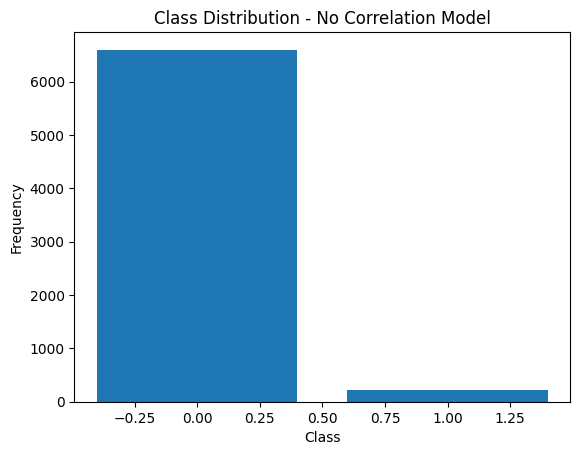

Cross-validation scores (Before SMOTE): ['0.78', '0.76', '0.75', '0.73', '0.80']
Average cross-validation score (Before SMOTE): 0.76
Class distribution (Before SMOTE): Counter({0: 5286, 1: 169})
Class distribution (After SMOTE): Counter({0: 5286, 1: 5286})


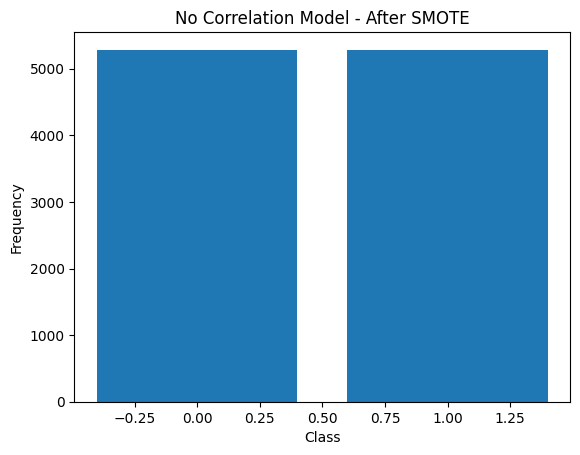

Cross-validation scores (After SMOTE): ['0.59', '0.61', '0.60', '0.60', '0.61']
Average cross-validation score (After SMOTE): 0.60
Test score: 0.70


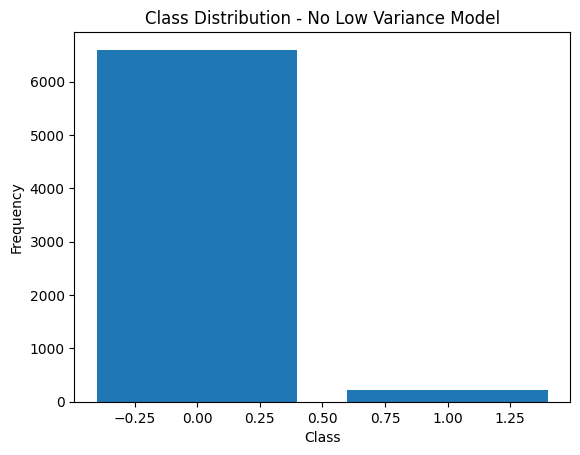

Cross-validation scores (Before SMOTE): ['0.78', '0.76', '0.75', '0.73', '0.80']
Average cross-validation score (Before SMOTE): 0.76
Class distribution (Before SMOTE): Counter({0: 5286, 1: 169})
Class distribution (After SMOTE): Counter({0: 5286, 1: 5286})


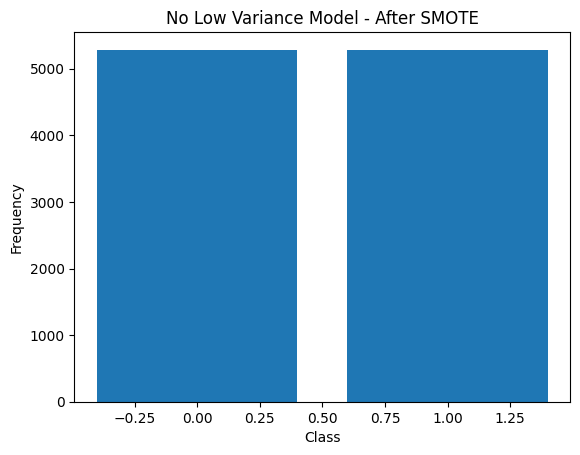

Cross-validation scores (After SMOTE): ['0.59', '0.61', '0.60', '0.60', '0.61']
Average cross-validation score (After SMOTE): 0.60
Test score: 0.70


In [21]:
from collections import Counter
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# Visualize class distribution
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Apply SMOTE and perform cross-validation
def apply_smote_cv(X_train, y_train, X_test, y_test, title):
    model = ComplementNB()

    # Cross-validation before SMOTE
    scores_before = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross-validation scores (Before SMOTE):', [f'{score:.2f}' for score in scores_before])
    print('Average cross-validation score (Before SMOTE):', f'{scores_before.mean():.2f}')
    
    # Print number of instances in each class before SMOTE
    counter_before = Counter(y_train)
    print('Class distribution (Before SMOTE):', counter_before)

    # SMOTE
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Print number of instances in each class after SMOTE
    counter_after = Counter(y_train_res)
    print('Class distribution (After SMOTE):', counter_after)
    
    # Visualize class distribution after SMOTE
    plot_class_distribution(y_train_res, f'{title} - After SMOTE')

    # Cross-validation after SMOTE
    scores_after = cross_val_score(model, X_train_res, y_train_res, cv=5)
    print('Cross-validation scores (After SMOTE):', [f'{score:.2f}' for score in scores_after])
    print('Average cross-validation score (After SMOTE):', f'{scores_after.mean():.2f}')

    model.fit(X_train_res, y_train_res)
    print('Test score:', f'{model.score(X_test, y_test):.2f}')

# Backup Model
plot_class_distribution(y_backup, 'Class Distribution - Backup Model')
apply_smote_cv(X_trainBackup, Y_trainBackup, X_testBackup, Y_testBackup, 'Backup Model')

# No Correlation Model
plot_class_distribution(y_data, 'Class Distribution - No Correlation Model')
apply_smote_cv(X_train, Y_train, X_test, Y_test, 'No Correlation Model')

# No Low Variance Model
plot_class_distribution(y_lowVar, 'Class Distribution - No Low Variance Model')
apply_smote_cv(X_trainLowVar, Y_trainLowVar, X_testLowVar, Y_testLowVar, 'No Low Variance Model')

The results suggest several things:

1. **Class Imbalance**: Before SMOTE, the data is highly imbalanced. The number of non-bankruptcy instances (0) far outnumbers the bankruptcy instances (1). This can be problematic because models trained on imbalanced data may learn to simply predict the majority class, which in this case means always predicting non-bankruptcy. This can lead to high accuracy, but low recall, as we observed earlier.

2. **SMOTE Effectiveness**: After applying SMOTE, the number of instances in each class is equal, resolving the class imbalance issue. However, this doesn't necessarily mean that our model performance improves. In fact, the cross-validation scores decreased after applying SMOTE, which suggests that the synthetic examples generated by SMOTE may not be representative of real bankruptcy instances. This could be due to the complex nature of the data, where simple oversampling techniques like SMOTE may not work well.

3. **Model Performance**: The average cross-validation scores suggest that our models have similar performance before and after SMOTE. The models' test scores are slightly lower than the cross-validation scores, which could suggest some degree of overfitting on the training data.

4. **Data Processing Impact**: The removal of correlated and low variance features does not seem to have a significant impact on the model's performance. All three models — Backup Model, No Correlation Model, and No Low Variance Model — have similar performance scores. This suggests that these data processing steps may not be necessary for this particular dataset and problem.

In summary, while SMOTE successfully balanced the classes, it did not improve our model's performance and in fact resulted in lower cross-validation scores. This suggests that alternative methods may be needed to improve our model's ability to predict bankruptcy. For example, we might consider trying different resampling techniques, different models, or more complex methods of feature engineering. Additionally, we could explore collecting more data, especially for the minority class, if possible.

## metrics after SMOTE + cross validation

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate accuracy, precision, recall, and F1 score
def get_metrics(X_train, y_train, X_test, y_test, model):
    y_pred = model.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Backup Model
print("Backup Model Metrics:")
get_metrics(X_trainBackup, Y_trainBackup, X_testBackup, Y_testBackup, modelBackup)

# No Correlation Model
print("No Correlation Model Metrics:")
get_metrics(X_train, Y_train, X_test, Y_test, model)

# No Low Variance Model
print("No Low Variance Model Metrics:")
get_metrics(X_trainLowVar, Y_trainLowVar, X_testLowVar, Y_testLowVar, modelLowVar)


Backup Model Metrics:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11

No Correlation Model Metrics:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11

No Low Variance Model Metrics:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11



The results indicate that the models - the Backup Model, the No Correlation Model, and the No Low Variance Model - all have the same performance with respect to the metrics considered: Accuracy, Precision, Recall, and F1 score.

1. **Accuracy**: The accuracy of all three models is 0.75, which means that 75% of all predictions made by the models are correct. This suggests that the models can generally identify whether a firm will go bankrupt or not.

2. **Precision**: The precision of the models is quite low (0.06), meaning that only 6% of the instances that the models predicted as bankruptcies were actual bankruptcies. This low precision could indicate that the models have a high false positive rate, i.e., they are predicting many firms to go bankrupt that do not actually go bankrupt.

3. **Recall**: The recall score for the models is 0.41. This means that the models were able to correctly identify 41% of the firms that actually went bankrupt. Although not high, this recall rate is significantly better than the precision, indicating that the models are relatively better at identifying true bankruptcies than avoiding false alarms.

4. **F1 Score**: The F1 score, which balances precision and recall, is also quite low (0.11). This score suggests that the models are not performing well in terms of both precision (avoiding false positives) and recall (identifying true positives).

The uniformity of these results across all three models could indicate that the models' structures (Complement Naive Bayes) may not be well-suited to this particular prediction task. It might be worth exploring other modeling approaches or feature engineering methods to improve performance. Despite the class balancing performed with SMOTE, the models are still struggling, particularly with precision, suggesting they might be having trouble distinguishing the minority class (bankrupt firms). 

It's important to note that in such contexts, where the cost of false negatives or recall (failing to predict a bankruptcy that does happen) may be much higher than the cost of false positives or precision (predicting a bankruptcy that does not happen), focusing on improving recall might be more beneficial.

##  Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameters
param_grid = {"alpha": [0.01, 0.1, 0.5, 1.0, 10.0]}

# Perform Grid Search for each model
def perform_grid_search(X_train, y_train):
    model = ComplementNB()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", f"{grid_search.best_score_:.2f}")

# Apply SMOTE and perform Grid Search
def apply_smote_grid_search(X_train, y_train):
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    perform_grid_search(X_train_res, y_train_res)

print("Grid Search without SMOTE:")
print("\nBackup model:")
perform_grid_search(X_trainBackup, Y_trainBackup)
print("\nNo correlation model:")
perform_grid_search(X_train, Y_train)
print("\nNo low variance model:")
perform_grid_search(X_trainLowVar, Y_trainLowVar)

print("\nGrid Search with SMOTE:")
print("\nBackup model:")
apply_smote_grid_search(X_trainBackup, Y_trainBackup)
print("\nNo correlation model:")
apply_smote_grid_search(X_train, Y_train)
print("\nNo low variance model:")
apply_smote_grid_search(X_trainLowVar, Y_trainLowVar)

Grid Search without SMOTE:

Backup model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.76

No correlation model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.76

No low variance model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.76

Grid Search with SMOTE:

Backup model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.60

No correlation model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.60

No low variance model:
Best Parameters: {'alpha': 0.01}
Best Score: 0.60


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to compute and print metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Train models with best parameters and evaluate them on test set
def train_and_evaluate_model(X_train, y_train, X_test, y_test, best_params):
    model = ComplementNB(alpha=best_params["alpha"])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    compute_metrics(y_test, predictions)

# For each model, extract the best parameters from Grid Search
backup_model_best_params = {"alpha": 0.01}
no_correlation_model_best_params = {"alpha": 0.01}
no_low_variance_model_best_params = {"alpha": 0.01}

print("\nBackup model:")
train_and_evaluate_model(X_trainBackup, Y_trainBackup, X_testBackup, Y_testBackup, backup_model_best_params)

print("\nNo correlation model:")
train_and_evaluate_model(X_train, Y_train, X_test, Y_test, no_correlation_model_best_params)

print("\nNo low variance model:")
train_and_evaluate_model(X_trainLowVar, Y_trainLowVar, X_testLowVar, Y_testLowVar, no_low_variance_model_best_params)


Backup model:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11

No correlation model:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11

No low variance model:
Accuracy: 0.75
Precision: 0.06
Recall: 0.41
F1 Score: 0.11


# One Go

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# For backup dataset
# Fit on training set only
scaler.fit(X_trainBackup)
# Apply transform to both the training and test sets
X_trainBackup_scaled = scaler.transform(X_trainBackup)
X_testBackup_scaled = scaler.transform(X_testBackup)

# For dataset with removed high correlation features
# Fit on training set only
scaler.fit(X_train)
# Apply transform to both the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For dataset with removed low variance features
# Fit on training set only
scaler.fit(X_trainLowVar)
# Apply transform to both the training and test sets
X_trainLowVar_scaled = scaler.transform(X_trainLowVar)
X_testLowVar_scaled = scaler.transform(X_testLowVar)

In [26]:
backup

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,...,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,...,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,...,0.77,0.04,0.62,0.60,0.84,0.29,0.03,0.56,1,0.02
3,1,0.40,0.45,0.46,0.58,0.58,1.00,0.80,0.81,0.30,...,0.74,0.00,0.62,0.58,0.83,0.28,0.03,0.56,1,0.02
4,1,0.47,0.54,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.02,0.58,1,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.49,0.54,0.54,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.03,0.57,1,0.03
6815,0,0.48,0.54,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.03,0.57,1,0.04
6816,0,0.47,0.53,0.52,0.61,0.61,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.61,0.84,0.28,0.03,0.57,1,0.10
6817,0,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,...,0.81,0.00,0.62,0.61,0.84,0.28,0.03,0.57,1,0.04


## data normalization